# Homework 4 (84 pts)

## Overview
This homework assignment is divided into two parts: regionalization and exploring how spatial regression can incorporate space into regression analysis. Although numerous variations of spatial regression are available in lecture examples and online resources, this assignment will only focus on the most commonly used models: slx, spatial error, and spatial lag models.

The primary objective of this assignment is to gain a deeper understanding of regionalization, spatial regression, and their practical application. By working with census data in NYC, you will gain insight into how spatially related areas can be clustered. Additionally, by analyzing Airbnb data in NYC, you will learn how spatial variables can impact regression outcomes and how to incorporate them into your analysis. 

## Grading
Each exercise will be graded based on the following rubrics:
- 2 points. Completed the task, presented the expected results, and codes were well documented and explained.
- 1 point. Completed the task with some disparity from the expected results.
- 0 point. Did not complete the excercise.

## Late submission policy
For late submission, every extra day after the due date will lead to 20% off of your points. Less than a day will be counted as one day. All submissions after the TA team posts the answers will not be accepted.

In [242]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
from shapely.geometry import shape
import cenpy

## Regionalization
### 1. Retrieve and Clean Data (6 pts)
For the first section of this assignment, census data at the census tract level will be utilized. Similar to homework 2, you will retrieve census data using the 2015-2019 5-year estimate from the American Community Survey. Only NYC will be downloaded with the following variables: 'B19013_001E', 'B25077_001E', 'B15003_001E','B15003_022E', 'B02001_001E', 'B02001_002E', 'B25008_001E', 'B25008_003E', 'B11001_001E', 'B11001_006E', 'B25018_001E', 'B19083_001E',  'B01002_001E',  and 'B08012_001E'. The retrieved data will be stored in a dataframe named **acs_data**. (2 pts)

In [243]:
# insert your code here
acs_cp= cenpy.products.ACS()

In [244]:
acs_data = acs_cp.from_place('New York, NY',
                                level='tract',
                                variables=['B19013_001E', 'B25077_001E', 'B15003_001E','B15003_022E', 'B02001_001E', 'B02001_002E', 'B25008_001E', 'B25008_003E', 'B11001_001E', 'B11001_006E', 'B25018_001E', 'B19083_001E',  'B01002_001E', 'B08012_001E'])

Matched: New York, NY to New York city within layer Incorporated Places


In [245]:
acs_data

,GEOID,geometry,B01002_001E,B02001_001E,B02001_002E,B08012_001E,B11001_001E,B11001_006E,B15003_001E,B15003_022E,B19013_001E,B19083_001E,B25008_001E,B25008_003E,B25018_001E,B25077_001E,state,county,tract
0,36085020801,"POLYGON ((-8262278.990 4946228.710, -8261996.3...",40.5,8498.0,8023.0,4042.0,3230.0,444.0,6256.0,1116.0,100543.0,0.4381,8485.0,1114.0,6.0,461000.0,36,085,020801
1,36085017012,"POLYGON ((-8257822.870 4945745.990, -8257700.4...",43.6,4321.0,3882.0,1753.0,1681.0,165.0,3288.0,681.0,89273.0,0.4374,4321.0,752.0,6.0,543500.0,36,085,017012
2,36085031901,"POLYGON ((-8256173.450 4957701.750, -8256171.1...",28.7,2816.0,1090.0,889.0,1051.0,290.0,1608.0,184.0,21250.0,0.6332,2816.0,1497.0,3.8,288500.0,36,085,031901
3,36085031902,"POLYGON ((-8256709.900 4959461.880, -8256698.5...",28.1,5343.0,1756.0,1994.0,1641.0,625.0,3010.0,601.0,46118.0,0.5606,5325.0,2528.0,5.2,328200.0,36,085,031902
4,36085014606,"POLYGON ((-8254594.160 4948740.120, -8254529.4...",41.5,5963.0,5683.0,3094.0,2313.0,226.0,4407.0,1071.0,103825.0,0.3779,5963.0,387.0,5.7,420600.0,36,085,014606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36081068200,"POLYGON ((-8210354.790 4963345.130, -8210303.5...",43.0,994.0,20.0,519.0,342.0,77.0,738.0,162.0,89000.0,0.3545,994.0,271.0,5.5,435100.0,36,081,068200
2062,36081038400,"POLYGON ((-8209957.050 4967415.210, -8209906.6...",42.3,2411.0,46.0,1116.0,684.0,239.0,1687.0,228.0,75114.0,0.3693,2388.0,708.0,5.6,417100.0,36,081,038400
2063,36081059000,"POLYGON ((-8208826.490 4968457.410, -8208815.6...",38.9,1466.0,116.0,627.0,434.0,161.0,1038.0,199.0,75750.0,0.4282,1466.0,323.0,6.0,455300.0,36,081,059000
2064,36081061800,"POLYGON ((-8208676.320 4964872.740, -8208537.3...",41.8,1796.0,94.0,869.0,709.0,160.0,1336.0,287.0,81406.0,0.4030,1796.0,326.0,4.3,421300.0,36,081,061800


To generate new columns in acs_data, refer to [ACS Detailed Table Shells](https://www.census.gov/programs-surveys/acs/technical-documentation/table-shells.2019.html#list-tab-LO1F1MU1CQP3YOHD2T). These new columns will include median household value, percentage of white, percentage of renters, percentage of female-led households, percentage of bachelor's degree holders, median number of rooms, Gini index, median age, and travel time to work. (2 pts)

In [246]:
acs_data['median_age'] = acs_data['B01002_001E']
acs_data['percentage_of_white'] = acs_data['B02001_002E'] / acs_data['B02001_001E']
acs_data['travel_time_to_work'] = acs_data['B08012_001E']
acs_data['percentage_of_female_led_households'] = acs_data['B11001_006E'] / acs_data['B11001_001E']
acs_data['percentage_of_bachelors_degree_holders'] = acs_data['B15003_022E'] / acs_data['B15003_001E']
acs_data['gini_index'] = acs_data['B19083_001E']
acs_data['percentage_of_renters'] = acs_data['B25008_003E'] / acs_data['B25008_001E']
acs_data['median_number_of_rooms'] = acs_data['B25018_001E']
acs_data['median_household_value'] = acs_data['B25077_001E']

In order to meet the requirements for later analysis, all nan values in acs_data should be replaced with 0. Following that, ONLY the above 9 variables should be rescaled using the `robust_scale()` function. The resulting scaled dataframe should be saved as **acs_scaled**. (2 pts)

In [247]:
# replace nan
acs_data = acs_data.fillna('0')

In [248]:
from sklearn.preprocessing import robust_scale

In [249]:
acs_scaled = acs_data
acs_scaled[['median_age','percentage_of_white','travel_time_to_work','percentage_of_female_led_households','percentage_of_bachelors_degree_holders','gini_index','percentage_of_renters','median_number_of_rooms','median_household_value']] = robust_scale(acs_scaled[['median_age','percentage_of_white','travel_time_to_work','percentage_of_female_led_households','percentage_of_bachelors_degree_holders','gini_index','percentage_of_renters','median_number_of_rooms','median_household_value']])
acs_scaled

,GEOID,geometry,B01002_001E,B02001_001E,B02001_002E,B08012_001E,B11001_001E,B11001_006E,B15003_001E,B15003_022E,...,tract,median_age,percentage_of_white,travel_time_to_work,percentage_of_female_led_households,percentage_of_bachelors_degree_holders,gini_index,percentage_of_renters,median_number_of_rooms,median_household_value
0,36085020801,"POLYGON ((-8262278.990 4946228.710, -8261996.3...",40.5,8498.0,8023.0,4042.0,3230.0,444.0,6256.0,1116.0,...,020801,0.440367,1.063150,2.170452,-0.087127,-0.092667,-0.182287,-1.132916,1.461538,-0.280031
1,36085017012,"POLYGON ((-8257822.870 4945745.990, -8257700.4...",43.6,4321.0,3882.0,1753.0,1681.0,165.0,3288.0,681.0,...,017012,0.819572,0.978513,0.189920,-0.318026,0.128476,-0.190312,-1.035026,1.461538,-0.064119
2,36085031901,"POLYGON ((-8256173.450 4957701.750, -8256171.1...",28.7,2816.0,1090.0,889.0,1051.0,290.0,1608.0,184.0,...,031901,-1.003058,0.031549,-0.557647,0.726292,-0.585025,2.054457,-0.216126,-0.230769,-0.731484
3,36085031902,"POLYGON ((-8256709.900 4959461.880, -8256698.5...",28.1,5343.0,1756.0,1994.0,1641.0,625.0,3010.0,601.0,...,031902,-1.076453,-0.076642,0.398443,1.342746,0.071135,1.222127,-0.346353,0.846154,-0.627584
4,36085014606,"POLYGON ((-8254594.160 4948740.120, -8254529.4...",41.5,5963.0,5683.0,3094.0,2313.0,226.0,4407.0,1071.0,...,014606,0.562691,1.079705,1.350205,-0.320654,0.404871,-0.872456,-1.284961,1.230769,-0.385763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36081068200,"POLYGON ((-8210354.790 4963345.130, -8210303.5...",43.0,994.0,20.0,519.0,342.0,77.0,738.0,162.0,...,068200,0.746177,-0.648036,-0.877785,0.427976,0.223893,-1.140728,-0.809211,1.076923,-0.347815
2062,36081038400,"POLYGON ((-8209957.050 4967415.210, -8209906.6...",42.3,2411.0,46.0,1116.0,684.0,239.0,1687.0,228.0,...,038400,0.660550,-0.649964,-0.361237,1.157993,-0.425501,-0.971052,-0.754598,1.153846,-0.394923
2063,36081059000,"POLYGON ((-8208826.490 4968457.410, -8208815.6...",38.9,1466.0,116.0,627.0,434.0,161.0,1038.0,199.0,...,059000,0.244648,-0.538758,-0.784339,1.284603,0.009915,-0.295787,-0.929006,1.461538,-0.294949
2064,36081061800,"POLYGON ((-8208676.320 4964872.740, -8208537.3...",41.8,1796.0,94.0,869.0,709.0,160.0,1336.0,287.0,...,061800,0.599388,-0.588369,-0.574951,0.431053,0.187776,-0.584695,-1.017894,0.153846,-0.383931


### 2. Analyze Data (2 pts)
Despite collecting all variables for each census tract, the underlying spatial characteristics are still uncertain. To confirm the applicability of regionalization to this dataset, it is necessary to determine whether spatial autocorrelation exists in these variables.

To do this, create a spatial weight matrix using the Queen method and calculate the global Moran's I for all 9 variables. Then, present your results in a dataframe that displays Moran's I and P-value for each variable. (2 pts)

In [250]:
# Create spatial weight metrix
from pysal.lib import weights
wq = weights.contiguity.Queen.from_dataframe(acs_scaled)

In [251]:
# Calculate Global Moran's I
from pysal.explore import esda
wq.transform = "R"
MoranI = pd.DataFrame()
column_list = ['median_age','percentage_of_white','travel_time_to_work','percentage_of_female_led_households','percentage_of_bachelors_degree_holders','gini_index','percentage_of_renters','median_number_of_rooms','median_household_value']
for i in column_list:
    moran = esda.moran.Moran(acs_scaled[i], wq)
    MoranI.loc[i,'Moran_I'] = moran.I
    MoranI.loc[i,'P_Value'] = moran.p_sim
MoranI

('WARNING: ', 229, ' is an island (no neighbors)')


,Moran_I,P_Value
median_age,0.241798,0.001
percentage_of_white,0.769866,0.001
travel_time_to_work,0.348324,0.001
percentage_of_female_led_households,0.589929,0.001
percentage_of_bachelors_degree_holders,0.596314,0.001
gini_index,0.240902,0.001
percentage_of_renters,0.614226,0.001
median_number_of_rooms,0.431719,0.001
median_household_value,0.525214,0.001


### 3. Regionalization (6 pts)
Create the regionalization model based on **acs_scaled** by specifying the linkage as "ward" and the number of clusters as 5. (2 pts)

In [252]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(
    linkage="ward", connectivity=wq.sparse, n_clusters=5
)
# Fit algorithm to the data
model.fit(acs_scaled[column_list])

AgglomerativeClustering(connectivity=<2066x2066 sparse matrix of type '<class 'numpy.float64'>'
	with 12914 stored elements in Compressed Sparse Row format>,
                        n_clusters=5)

Using the results from your model, create a choropleth map of the 5 clusters. Remember to add a legend. (2 pts)

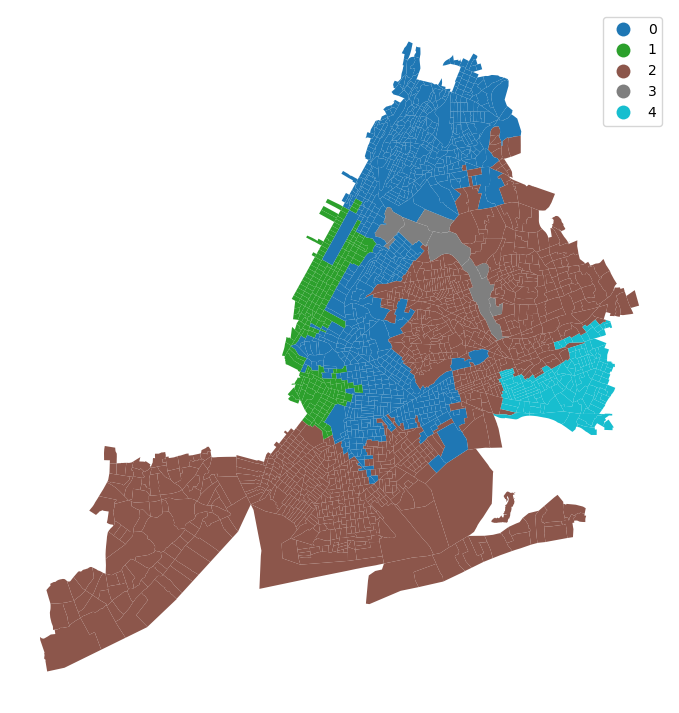

In [253]:
import matplotlib.pyplot as plt
acs_scaled["ward5wq"] = model.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
acs_scaled.plot(
    column="ward5wq",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

Regionalization results heavily rely on the spatial constraint, which is determined by the spatial weight matrix. To explore the impact of the spatial weight matrix on the results, try a new spatial matrix using 4 nearest neighbors.

Using ward linkage and 5 clusters specified in your function, generate a new regionalization model. Then, plot the new clusters with a legend. (2 pts)

In [254]:
# insert your code here
from libpysal.weights import KNN
wknn = KNN.from_dataframe(acs_scaled, k=4)

In [255]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
model_new = AgglomerativeClustering(
    linkage="ward", connectivity=wknn.sparse, n_clusters=5
)
# Fit algorithm to the data
model_new.fit(acs_scaled[column_list])

AgglomerativeClustering(connectivity=<2066x2066 sparse matrix of type '<class 'numpy.float64'>'
	with 8264 stored elements in Compressed Sparse Row format>,
                        n_clusters=5)

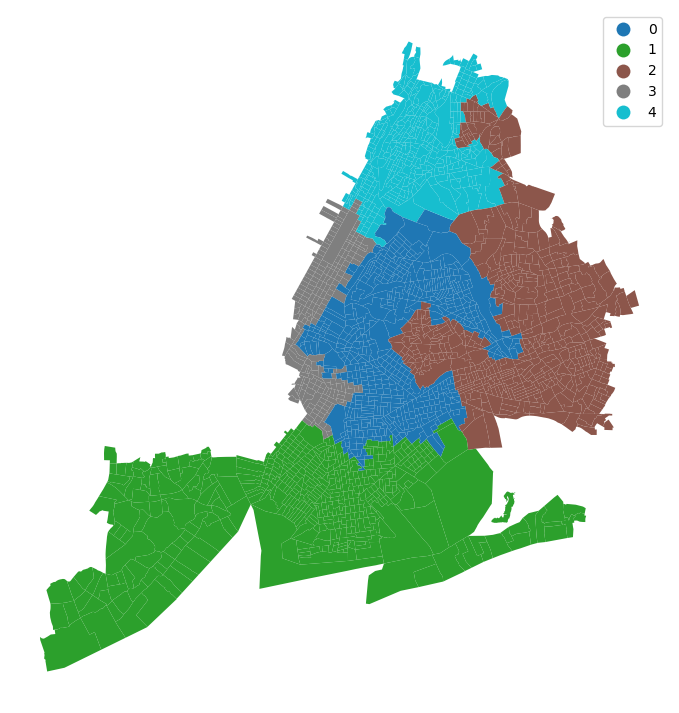

In [256]:
import matplotlib.pyplot as plt
acs_scaled["ward5wknn"] = model_new.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
acs_scaled.plot(
    column="ward5wknn",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

### 4. Evaluate Regionalization Models (6 pts)
To determine which regionalization model is "better," you can compare your models based on measures of geographical coherence and goodness of fit.
### 4.1 Geographical Coherence (2 pts)
Compute the isoperimetric quotient for each cluster in both models. Then, concatenate the isoperimetric quotients into a new dataframe with columns labeled as *ward5wq* and *ward5wknn* and rows representing the 5 clusters. Show your dataframe. (2 pts)

In [257]:
# insert your code here
results = []
for cluster_type in ("ward5wq", "ward5wknn"):
    # compute the region polygons using a dissolve
    regions = acs_scaled[[cluster_type, "geometry"]].dissolve(by=cluster_type)
    # compute the actual isoperimetric quotient for these regions
    ipqs = (
        regions.area * 4 * np.pi / (regions.boundary.length ** 2)
    )
    # cast to a dataframe
    result = ipqs.to_frame(cluster_type)
    results.append(result)
# stack the series together along columns
pd.concat(results, axis=1)


,ward5wq,ward5wknn
0,0.046669,0.126724
1,0.064048,0.151508
2,0.053683,0.117768
3,0.155195,0.100872
4,0.190876,0.153410


### 4.2 Feature Coherence (goodness of fit) (4 pts)
Another measurement that can be used to evaluate the quality of the regionalization models is the `metrics.calinski_harabasz_score()` (CH) function, which calculates the ratio of within-cluster variance to between-cluster variance. Compute the CH score for both the original model with Queen spatial weight matrix and the model with 4 nearest neighbors. Then, report the CH scores of both models. (2 pts)

In [258]:
# insert your code here
from sklearn import metrics
ch_scores = []
for cluster_type in ("ward5wq", "ward5wknn"):
    # compute the CH score
    ch_score = metrics.calinski_harabasz_score(
        # using scaled variables
        robust_scale(acs_scaled[column_list]),
        # using these labels
        acs_scaled[cluster_type],
    )
    # and append the cluster type with the CH score
    ch_scores.append((cluster_type, ch_score))

# re-arrange the scores into a dataframe for display
pd.DataFrame(
    ch_scores, columns=["cluster type", "CH score"]
).set_index("cluster type")

,CH score
cluster type,
ward5wq,150.089355
ward5wknn,135.344478


Based on Geographical Coherence and Feature Coherence, which regionalization model performs better? And why? (2 pts)

Answer: For all functions in metrics that end in "score", higher numbers indicate greater fit, whereas functions that end in loss work in the other direction. Thus, the Queen method performs better (150.089 > 135.344).

## Spatial Regression
The second section uses Airbnb listing in Manhattan. Since you have been familiar with the datasets, codes are provided for retrieving data. 
### 1. Read Data

In [259]:
url_qr = "https://data.cityofnewyork.us/resource/63ge-mke6.json?$where=BoroName='Manhattan'"
ct = pd.read_json(url_qr)
ct['the_geom'] = ct['the_geom'].apply(shape)
ct = gpd.GeoDataFrame(ct, geometry='the_geom').set_crs(epsg = 4326)

In [260]:
listing_raw = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz')
listing_raw.price = listing_raw.price.replace('[\$,]', '', regex=True).astype(float)
listing_g = gpd.GeoDataFrame(listing_raw, 
                             geometry = gpd.points_from_xy(listing_raw.longitude, 
                                                           listing_raw.latitude)).set_crs(epsg = 4326)
listing = gpd.tools.sjoin(listing_g, ct[['geoid', 'boroname', 'the_geom']], predicate="within", how='inner')
listing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17333 entries, 0 to 34389
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            17333 non-null  int64   
 1   listing_url                                   17333 non-null  object  
 2   scrape_id                                     17333 non-null  int64   
 3   last_scraped                                  17333 non-null  object  
 4   source                                        17333 non-null  object  
 5   name                                          17325 non-null  object  
 6   description                                   17054 non-null  object  
 7   neighborhood_overview                         9538 non-null   object  
 8   picture_url                                   17333 non-null  object  
 9   host_id                                   

### 2. Clean and Visualize Data (24 pts)
### 2.1 Clean Data (8 pts)
Before proceeding with any regression analysis, it is always important to familiarize yourself with the data. One of the assumptions of Ordinary Least Squared (OLS) linear regression is that the underlying distribution of each variable should follow a normal distribution. One way to check for normality is by plotting the frequency of values in each variable using a histogram.

Make a histogram of *price* and answer whether it follows normal distribution in a separate markdown cell. (2 pts)

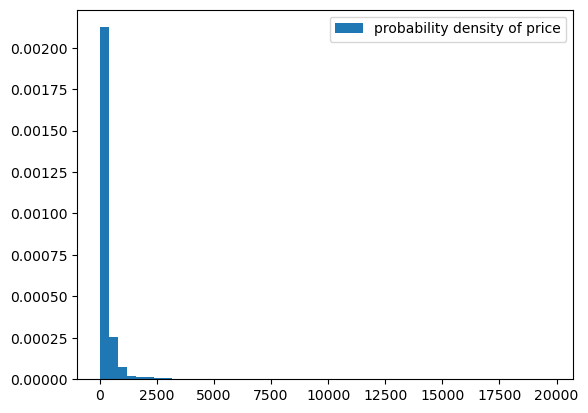

In [262]:
# insert your code here
plt.hist(listing.price,bins=50,density=True,label="probability density of price")
plt.legend()

Answer: Apprently the price doesn't follow normal distribution. It's highly skewed.

Notice that 0 may exist in *price* column, which makes no sense in real world because no Airbnb is offered for free. To confirm whether 0 exists, use `describe` function to check the numeric distribution of *price*. If yes, remove all rows with 0 in *price*. (2 pts)

In [263]:
# insert your code here
listing.price.describe()

count    17333.000000
mean       301.225062
std        533.570412
min          0.000000
25%        110.000000
50%        175.000000
75%        300.000000
max      19750.000000
Name: price, dtype: float64

In [264]:
# So '0' does exist!
# Get rid of '0' 
listing = listing[listing['price']!=0]
listing.price.describe()

count    17308.000000
mean       301.660157
std        533.832719
min         10.000000
25%        110.000000
50%        175.000000
75%        300.000000
max      19750.000000
Name: price, dtype: float64

For analytical purposes, it is common to transform highly skewed variables into data that appears to have a normal distribution. One commonly used transformation is to take the logarithm of the original variable.

Take the log value of *price* (named as *log_price*) and make a histogram plot of *log_price*. (2 pts). 

Does it look like a normal distribution? Answer in a separate markdown cell. (2 pts) 

In [265]:
# insert your code here
listing['log_price'] = np.log(listing['price'])

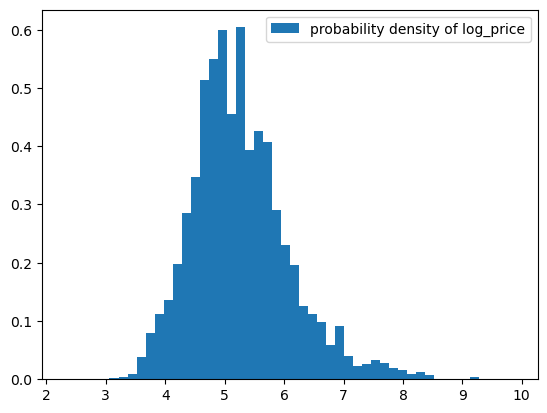

In [266]:
plt.hist(listing.log_price,bins=50,density=True,label="probability density of log_price")
plt.legend()

Answer: After taking the logarithm of price, it now looks far more like a normal distribution.

### 2.2 Create Dummy Variables (12 pts)

Read [lecture example of San Diego Airbnb](https://geographicdata.science/book/notebooks/11_regression.html#exogenous-effects-the-slx-model) and you'll notice that both room type and property type can be important in determining listing prices. However, in order to include this information in a regression analysis, you need to transform these text variables into dummy variables.  

Following the same step in the example, you can create four dummy variables (rt_Entire_home/apt, rt_Hotel_room, rt_Private_room, and rt_Shared_room) for room type. Show your **rt** dataframe. (2 pts)

In [267]:
rt = pd.get_dummies(listing['room_type'])
rt.rename(columns={'Entire home/apt':'rt_Entire_home/apt','Hotel room':'rt_Hotel_room','Private room':'rt_Private_room','Shared room':'rt_Shared_room'},inplace=True)
rt

,rt_Entire_home/apt,rt_Hotel_room,rt_Private_room,rt_Shared_room
0,1,0,0,0
412,0,0,1,0
2696,0,0,1,0
3545,0,0,0,1
5390,1,0,0,0
...,...,...,...,...
28562,1,0,0,0
28887,1,0,0,0
36189,1,0,0,0
40190,1,0,0,0


Another variable that may be important in determining Airbnb listing prices is whether the host has been verified with their identity. Similarly, you can create a dummy variable to record this information. Since only t (standing for ture) and f (standing for false) are stored in *host_id_verified*, you can only rename t as the new *host_id_verified* in dataframe **host**. Show your dataframe **host**. (2 pts)

In [268]:
host = pd.get_dummies(listing['host_identity_verified'])
host.rename(columns={'t':'host_id_verified'},inplace=True)
host

,f,host_id_verified
0,0,1
412,0,1
2696,0,1
3545,1,0
5390,0,1
...,...,...
28562,0,1
28887,0,1
36189,0,1
40190,0,1


Though [the San Diego example](https://geographicdata.science/book/notebooks/11_regression.html#exogenous-effects-the-slx-model) provides a method to create dummy variables for property type, the code cannot be directly used in the New York City Airbnb dataset because the property type texts are recorded differently. With the modified *simplify* function, create a new column named *property_group* in **listing** dataframe. Next you can create dummy variables in dataframe **pg**. Show your dataframe **pg**. (2 pts) 

In [269]:
def simplify(p):
    bigs = ['apartment', 'condo', 'townhouse', 'resort']
    p_lst = p.split()
    for p in p_lst:
        if p in bigs:
            return p

In [270]:
for i in listing.index:
    listing.loc[i,'property_group'] = simplify(listing.loc[i,'property_type'])

In [271]:
listing['property_group'].unique()

array([nan, 'condo', None, 'townhouse', 'apartment', 'resort'],
      dtype=object)

In [272]:
pg = pd.get_dummies(listing['property_group'])
pg.rename(columns={'apartment':'pg_apartment','condo':'pg_condo','resort':'pg_resort','townhouse':'pg_townhouse'},inplace=True)
pg

,pg_apartment,pg_condo,pg_resort,pg_townhouse
0,0,0,0,0
412,0,0,0,0
2696,0,0,0,0
3545,0,0,0,0
5390,0,0,0,0
...,...,...,...,...
28562,0,0,0,0
28887,0,0,0,0
36189,0,0,0,0
40190,0,0,0,0


Another important variable that affects listing prices is the number of bathrooms in each listing, which is stored as text in the **listing** dataframe with null values. To prepare the data for analysis, replace all null values in the *bathrooms_text* column with 0. 

Next, you can create a function called *find_bath* like *simplify*. *find_bath* function will split the text in *bathrooms_text* and return the number of bathrooms in float. (2 pts) 

Apply this function to *bathrooms_text* to create a new column *bathrooms* in **listing**. (2 pts)

In [273]:
# replace null
listing['bathrooms_text'][listing['bathrooms_text'].isna()==True] = '0'

In [274]:
listing['bathrooms_text'].unique()

array(['1 bath', '1 private bath', '1 shared bath', '2 shared baths',
       '2 baths', '1.5 baths', '3 baths', '1.5 shared baths',
       '0 shared baths', '2.5 baths', '3 shared baths', '4 baths',
       '3.5 baths', '5.5 baths', '4.5 baths', 'Half-bath',
       '2.5 shared baths', '0 baths', '0', 'Shared half-bath',
       'Private half-bath', '5 baths', '6.5 baths', '6 baths',
       '4.5 shared baths', '6 shared baths', '4 shared baths', '8 baths',
       '7 baths', '3.5 shared baths'], dtype=object)

In [275]:
listing['bathrooms_text'][listing['bathrooms_text']=='Half-bath'] = '0.5'
listing['bathrooms_text'][listing['bathrooms_text']=='Shared half-bath'] = '0.5'
listing['bathrooms_text'][listing['bathrooms_text']=='Private half-bath'] = '0.5'

In [276]:
listing['bathrooms_text'].unique()

array(['1 bath', '1 private bath', '1 shared bath', '2 shared baths',
       '2 baths', '1.5 baths', '3 baths', '1.5 shared baths',
       '0 shared baths', '2.5 baths', '3 shared baths', '4 baths',
       '3.5 baths', '5.5 baths', '4.5 baths', '0.5', '2.5 shared baths',
       '0 baths', '0', '5 baths', '6.5 baths', '6 baths',
       '4.5 shared baths', '6 shared baths', '4 shared baths', '8 baths',
       '7 baths', '3.5 shared baths'], dtype=object)

In [277]:
def find_bath(p):
    return p.split()[0]

In [278]:
for i in listing.index:
    listing.loc[i,'bathrooms'] = find_bath(listing.loc[i,'bathrooms_text'])
listing['bathrooms'] = listing['bathrooms'].astype(float)   

In [279]:
listing['bathrooms'].unique()

array([1. , 2. , 1.5, 3. , 0. , 2.5, 4. , 3.5, 5.5, 4.5, 0.5, 5. , 6.5,
       6. , 8. , 7. ])

Merge dataframe **rt**, **host**, and **pg** to **listing**. Show the infomation of your new **listing**. (2 pts)

In [280]:
# insert your code here
listing = pd.concat([listing, rt, host, pg], axis=1)

In [281]:
listing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17308 entries, 0 to 34389
Data columns (total 91 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            17308 non-null  int64   
 1   listing_url                                   17308 non-null  object  
 2   scrape_id                                     17308 non-null  int64   
 3   last_scraped                                  17308 non-null  object  
 4   source                                        17308 non-null  object  
 5   name                                          17300 non-null  object  
 6   description                                   17054 non-null  object  
 7   neighborhood_overview                         9538 non-null   object  
 8   picture_url                                   17308 non-null  object  
 9   host_id                                   

### 2.3 Create Spatial Variable (Distance to City Center) (4 pts)
Given the spatial nature of NYC listing, adding spatial variable can help improve the regression performance. One tpical spatial variable is the distance to city center. Though there is no concensus on where exactly the city center is in NYC, you can use the median center as a proxy. Recall what you've done in Homework 2 to create the median center and name it as *city_center*. (2 pts) 

In [282]:
# insert your code here
from pointpats import centrography
city_center = centrography.euclidean_median(listing[["longitude","latitude"]])

To calculate distance in meters from coordinates, you must first transform the crs into the USA Contiguous Albers Equal Area (provided below) because this datum is measured by meters. Refer to [data cleaning process for San Diego Airbnb](https://geographicdata.science/book/data/airbnb/regression_cleaning.html) and generate *d2center* column in **listing**. (2 pts)

In [283]:
tgt_crs = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 "\
          "+lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"

In [284]:
from shapely import Point
from scipy.spatial.distance import cdist

center = gpd.GeoSeries(Point(city_center[0], city_center[1]), crs=listing.crs).to_crs(tgt_crs)[0]
center = (center.x, center.y)

d2b = lambda pt: cdist([(pt.x, pt.y)], [center])[0][0]/1000
# insert your code here
listing['d2center'] = listing['geometry'].to_crs(tgt_crs)\
                                         .apply(d2b)

In [285]:
listing['d2center']

0        0.526248
412      0.784400
2696     0.777965
3545     0.626747
5390     0.729413
           ...   
28562    3.403774
28887    3.429879
36189    3.429222
40190    3.160679
34389    4.736345
Name: d2center, Length: 17308, dtype: float64

## 3. Regressions (40 pts)
### 3.1 Linear Regression (6 pts)
The dependent variables used here include "accommodates", "bedrooms", "bathrooms", "host_id_verified", "rt_Shared_room", "pg_apartment", "pg_condo", "pg_townhouse", "pg_resort", "d2center" and the independent variable is "log_price". Create a new dataframe **X** which contains all dependent variables and *geometry* in **listing**. Remove all null values in **X** and show the shape of **X**. (2 pts)

In [286]:
listing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17308 entries, 0 to 34389
Data columns (total 92 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            17308 non-null  int64   
 1   listing_url                                   17308 non-null  object  
 2   scrape_id                                     17308 non-null  int64   
 3   last_scraped                                  17308 non-null  object  
 4   source                                        17308 non-null  object  
 5   name                                          17300 non-null  object  
 6   description                                   17054 non-null  object  
 7   neighborhood_overview                         9538 non-null   object  
 8   picture_url                                   17308 non-null  object  
 9   host_id                                   

In [287]:
# insert your code here
X = listing[["geometry", "accommodates", "bedrooms", "bathrooms", "host_id_verified", "rt_Shared_room", "pg_apartment", "pg_condo", "pg_townhouse", "pg_resort", "d2center"]]

In [288]:
X.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17308 entries, 0 to 34389
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geometry          17308 non-null  geometry
 1   accommodates      17308 non-null  int64   
 2   bedrooms          14752 non-null  float64 
 3   bathrooms         17308 non-null  float64 
 4   host_id_verified  17308 non-null  uint8   
 5   rt_Shared_room    17308 non-null  uint8   
 6   pg_apartment      17308 non-null  uint8   
 7   pg_condo          17308 non-null  uint8   
 8   pg_townhouse      17308 non-null  uint8   
 9   pg_resort         17308 non-null  uint8   
 10  d2center          17308 non-null  float64 
dtypes: float64(3), geometry(1), int64(1), uint8(6)
memory usage: 1.4 MB


In [289]:
X = X.dropna()
X.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14752 entries, 412 to 34389
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geometry          14752 non-null  geometry
 1   accommodates      14752 non-null  int64   
 2   bedrooms          14752 non-null  float64 
 3   bathrooms         14752 non-null  float64 
 4   host_id_verified  14752 non-null  uint8   
 5   rt_Shared_room    14752 non-null  uint8   
 6   pg_apartment      14752 non-null  uint8   
 7   pg_condo          14752 non-null  uint8   
 8   pg_townhouse      14752 non-null  uint8   
 9   pg_resort         14752 non-null  uint8   
 10  d2center          14752 non-null  float64 
dtypes: float64(3), geometry(1), int64(1), uint8(6)
memory usage: 777.9 KB


In [290]:
X.shape

(14752, 11)

Create another series **y** storing *log_price*. Remember to keep **X** and **y** in the same number of rows. Show the number of rows of **y**. (2 pts)

In [291]:
y = listing['log_price']
y = y[X.index]
y

412      4.787492
2696     3.912023
3545     5.298317
6608     5.298317
12645    5.799093
           ...   
28562    5.225747
28887    5.298317
36189    5.575949
40190    5.480639
34389    5.438079
Name: log_price, Length: 14752, dtype: float64

In [292]:
# Show the number of rows of y
y.count()

14752

Run OLS based on your **X** and **y**. Interpret your results: Do these variables explain the listing price well? Why or why not? (2 pts)

In [293]:
# insert your code here
from pysal.model import spreg
# Fit OLS model
list = ["accommodates", "bedrooms", "bathrooms", "host_id_verified", "rt_Shared_room", "pg_apartment", "pg_condo", "pg_townhouse", "pg_resort", "d2center"]
m1 = spreg.OLS(
    # Dependent variable
    y.values,
    # Independent variables
    X[list].values,
    # Dependent variable name
    name_y="log_price",
    # Independent variable name
    name_x=list,
)

In [294]:
print(m1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   log_price                Number of Observations:       14752
Mean dependent var  :      5.2698                Number of Variables   :          11
S.D. dependent var  :      0.8565                Degrees of Freedom    :       14741
R-squared           :      0.4904
Adjusted R-squared  :      0.4900
Sum squared residual:    5514.730                F-statistic           :   1418.2792
Sigma-square        :       0.374                Prob(F-statistic)     :           0
S.E. of regression  :       0.612                Log likelihood        :  -13674.523
Sigma-square ML     :       0.374                Akaike info criterion :   27371.045
S.E of regression ML:      0.6114                Schwarz criterion     :   27454.636

-----------------------------------------------------------------------------

Answer: It seems the model can explain the price quite well: nearly all the regression coefficient are significant (except the dummy variable of townhouse). The R-square indicates that we can explain almost 50% of the variance in the price using this model.

And the results are largely as expected: more people the house accommodates, more bed rooms, more bath rooms lead to higher price; and shared-room leads to lower price. Resort and apartment have the highest average price, condo a little lower, and non-included-type and townhouse are the lowest (though townhouse is not significant).

However, our model might display some clustering in the errors, which may be a problem as that violates the i.i.d. assumption linear models usually come built-in with. 
To interrogate this, we can do a few things: One simple concept might be to look at the correlation between the error in predicting an Airbnb and the error in predicting its nearest neighbor.

### 3.2 Verification (8 pts)
The above OLS model provides a base model for further analysis. From all perspectives, this model should be revised to better represent the reality. To verify whether space plays an important role in explaining listing price, the residuals of OLS can help.

Create a new column *residual* in dataframe **X**. Plot the residuals with 5 quantile using your color. Add legend and basemap to your map. (2 pts)

In [295]:
# insert your code here
X['residual'] = m1.u
X['residual']

412     -0.596222
2696    -1.247757
3545    -0.063623
6608    -0.447408
12645    0.432475
           ...   
28562   -0.209539
28887    0.238235
36189    0.329602
40190    0.577730
34389    0.332648
Name: residual, Length: 14752, dtype: float64

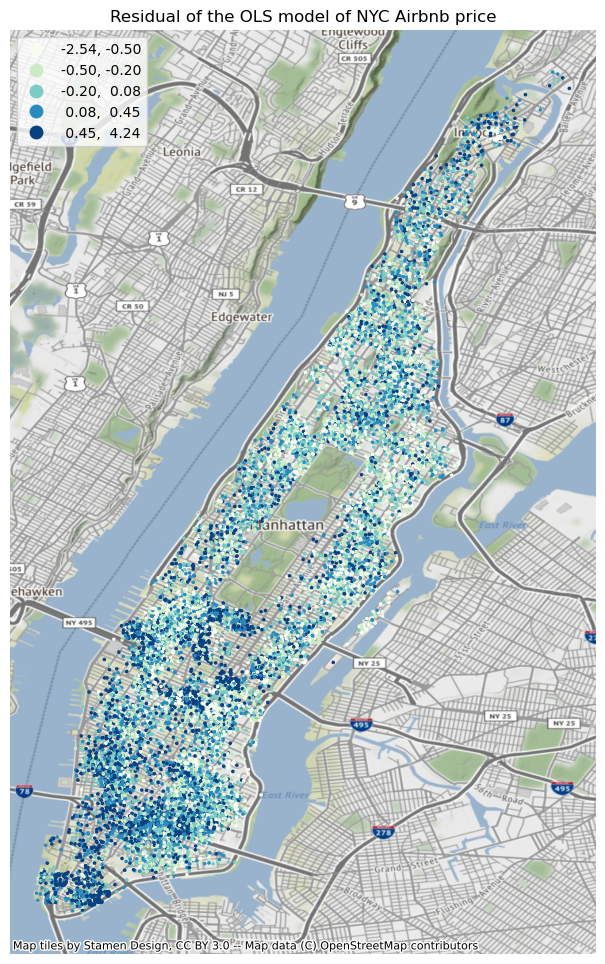

In [296]:
import contextily
ax = (
    X.plot("residual", cmap="GnBu", marker=".",markersize=10,figsize=(12,12),legend=True,scheme= 'Quantiles',k=5,legend_kwds={'loc': 'upper left'})
)
plt.title('Residual of the OLS model of NYC Airbnb price')
# Add basemap
contextily.add_basemap(ax, crs=X.crs)
# Remove axes
ax.set_axis_off();

How do you interpret the spatial distribution of your OLS residuals? Is it clustered or scattered across NYC? (2 pts)

Answer: We can tell that the OLS residuals are clustered in some area of NYC, especially downtown Manhattan (the financial dist) and midtown (under the Central Park). This indicates that inside the residuals there are untouched elements that highly influence the price - we must go further and include spatial elements into our model.

In addition to visual check, Moran's I provides more proof on spatial distribution. Create a row-standardized spatial weight matrix (named as wd) from distance-based knn method. Use 4 as the number of neighbors. (2 pts)

In [297]:
# insert your code here
wd = KNN.from_dataframe(X, k=4)
wd.transform = "R"

Next, you can check the global Moran's I with the residual. What is the value? And how can you conclude the spatial characteristics of the residual? (2 pts)

In [298]:
# insert your code here
moran = esda.moran.Moran(X['residual'], wd)
moran.I

0.2597883913959337

Answer: The Global Moran's I of the residual is positive and pretty big - this prove our judgement that the residuals are clustered in areas of NYC and show positive spatial autocorrelation. This is to say, the price of Airbnb listings have positive spatial sutocorrelation inside the NYC.

### 3.3 Exogenous Effect -- SLX Model (8 pts)
With spatial clustering exists in the OLS residuals, it implies that adding spatial components to your regression can improve the model performance. Assuming that there is no interaction between the dependent variables and their spatial lags, SLX model can be built using `spreg.OLS` function as the spatial lags of the dependent variables are treated as exogenous variables.

Create only spatial lags for dummy variables of property types condo, townhouse, and resort. Rename the spatial lags by adding "w_" before their original names. Store these new variables in dataframe **wx**. (2 pts)  

In [299]:
# Select only columns in `X` containing the keyword `pg_`
lag_variables_used = X.filter(
        like="pg_"
        # Compute the spatial lag of each of those variables
    )
wx = lag_variables_used.apply(lambda y: weights.spatial_lag.lag_spatial(wd, y)
        # Rename the spatial lag, adding w_ to the original name
    )
wx = wx.rename(columns=lambda c: "w_"+ c
        # Remove the lag of the binary variable for apartments
    )
wx = wx.drop("w_pg_apartment", axis=1)


In [300]:
wx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14752 entries, 412 to 34389
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   w_pg_condo      14752 non-null  float64
 1   w_pg_townhouse  14752 non-null  float64
 2   w_pg_resort     14752 non-null  float64
dtypes: float64(3)
memory usage: 461.0 KB


Create a new dataframe **slx_exog** by merging **X** and **wx**. Now you can apply `spreg.OLS` function to the new dataframe and fit the model. Present your model results below. (2 pts)

In [301]:
# insert your code here
# Note: Not include the geom and residual columns here in slx_exog
slx_exog = X[["accommodates", "bedrooms", "bathrooms", "host_id_verified", "rt_Shared_room", "pg_apartment", "pg_condo", "pg_townhouse", "pg_resort", "d2center"]].join(wx)
m2 = spreg.OLS(
    # Dependent variable
    y.values,
    # Independent variables
    slx_exog.values,
    # Dependent variable name
    name_y="log_price",
    # Independent variables names
    name_x=slx_exog.columns.tolist(),
)

In [302]:
print(m2.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   log_price                Number of Observations:       14752
Mean dependent var  :      5.2698                Number of Variables   :          14
S.D. dependent var  :      0.8565                Degrees of Freedom    :       14738
R-squared           :      0.4912
Adjusted R-squared  :      0.4907
Sum squared residual:    5505.589                F-statistic           :   1094.4554
Sigma-square        :       0.374                Prob(F-statistic)     :           0
S.E. of regression  :       0.611                Log likelihood        :  -13662.286
Sigma-square ML     :       0.373                Akaike info criterion :   27352.572
S.E of regression ML:      0.6109                Schwarz criterion     :   27458.960

-----------------------------------------------------------------------------

Compare the result with the OLS result. Is there any difference with the coefficients of each variable? Are there any new variables? Are these coefficients all statistically significant? (2 pts)

Does slx model improve the performance of OLS? (2 pts)

Answer: The coefficients of all the variables have changed. That's because we added new dummy variables that reveal some of the  influences that used to be covered in the residual (the Exogenous Effect). The new variables we added are partly-significan,  suggesting our initial hypothesis on the role of the surrounding houses might indeed be at work here. 

Sadly,not all the coefficients are significant, and the performance of this model is just slightly higher that the original OLS model without the Exogenous Effect, whhich means there are still space for improvement. But note that confidence intervals of the coefficients have changed: this indicates that we've fixed some error in the OLS model.

### 3.4 Spatial Error Regression (6 pts)
Another assumption is that spatial clustering exists only in the error terms of OLS model. Use the same dependent and independ variables and spatial weight matrix *wd* for your spatial error model. Report the model results below. (2 pts)

In [303]:
# Fit spatial error model with `spreg`
# (GMM estimation allowing for heteroskedasticity)
m3 = spreg.GM_Error_Het(
    # Dependent variable
    y.values,
    # Independent variables
    X[list].values,
    # Spatial weights matrix
    w=wd,
    # Dependent variable name
    name_y="log_price",
    # Independent variables names
    name_x=list,
)

In [304]:
print(m3.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES (HET)
---------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   log_price                Number of Observations:       14752
Mean dependent var  :      5.2698                Number of Variables   :          11
S.D. dependent var  :      0.8565                Degrees of Freedom    :       14741
Pseudo R-squared    :      0.4885
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       4.8829417       0.0239329     204.0259487       0.0000000
        accommodates       0.1698699       0.0037481      45.3218522       0.00

Compare the result with the OLS result. Is there any difference with the coefficients of each variable? Are these coefficients all statistically significant? (2 pts) 

What is the meaning of lambda? Does spatial error model improve the performance of OLS? (2 pts) 

Answer: Compared with the original OLS model, all the coefficients are slightly changed because we added spatial error effect into the model. The townhouse is still not significant, and the 'host_id_verified' newly become insignificant.

The lambda here inside this model is the coefficient of the spatial lag in the error. In the spatial error model, the error is correlated: there is a spatial-lag effect. Lambda here is to measure that effect.

The R-square doesn't seem to change much, which means the performance of this model tends to stay similar with the original one.

### 3.5 Spatial Lag Regression (6 pts)

You can also assume that spatial clustering exists in the dependent variables of the OLS model. Use the same dependent and independ variables and spatial weight matrix *wd* for your spatial lag model. Report the model results below. (2 pts)

In [305]:
# Fit spatial lag model with `spreg`
# (GMM estimation)
m4 = spreg.GM_Lag(
    # Dependent variable
    y.values,
    # Independent variables
    X[list].values,
    # Spatial weights matrix
    w=wd,
    # Dependent variable name
    name_y="log_price",
    # Independent variables names
    name_x=list,
)

In [306]:
print(m4.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   log_price                Number of Observations:       14752
Mean dependent var  :      5.2698                Number of Variables   :          12
S.D. dependent var  :      0.8565                Degrees of Freedom    :       14740
Pseudo R-squared    :      0.5440
Spatial Pseudo R-squared:  0.4954

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       3.5658046       0.0882972      40.3841211       0.0000000
        accommodates       0.1741354       0.0034371      50.6627988       0.0000000
            bedrooms       0.0610240       0.0099377       

Compare the result with the OLS result. Is there any difference with the coefficients of each variable? Are these coefficients all statistically significant? (2 pts) 

What is the meaning of W_log_price? Does spatial lag model improve the performance of OLS? (2 pts)

Answer: Same here, coefficients are slightly different because we include the spatial lag effect in this model. Townhouse stayed to be insignificant here.

The 'W_log_price' measures the spatial lag effect in the dependent variable (y). This model seems to imorove the performance quite a lot (R-square = 0.54).

### 3.6 Other model (6 pts)
To better improve the model performance, what else will you do? For example, you can create a new spatial variable and pick up one of the spatial models to build a new model. Show how you create the new spatial variable (2 pts) and new model results (2 pts). 

Answer: We think the review score will influence if the guest choose this listing or not, then further influence the price of this listing. The review scores in the area will also have spatial effect on the price: we can assume if the scores in the whole area become higher, the host tend to raise the price.

Therefore, we include 'review_scores_rating' into our W, and then use the SLX model to examine the result.

In [307]:
X_2 = listing[["geometry", "accommodates", "bedrooms", "bathrooms", "host_id_verified", "rt_Shared_room", "pg_apartment", "pg_condo", "pg_townhouse", "pg_resort", "d2center" ,"review_scores_rating"]]
X_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17308 entries, 0 to 34389
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   geometry              17308 non-null  geometry
 1   accommodates          17308 non-null  int64   
 2   bedrooms              14752 non-null  float64 
 3   bathrooms             17308 non-null  float64 
 4   host_id_verified      17308 non-null  uint8   
 5   rt_Shared_room        17308 non-null  uint8   
 6   pg_apartment          17308 non-null  uint8   
 7   pg_condo              17308 non-null  uint8   
 8   pg_townhouse          17308 non-null  uint8   
 9   pg_resort             17308 non-null  uint8   
 10  d2center              17308 non-null  float64 
 11  review_scores_rating  12572 non-null  float64 
dtypes: float64(4), geometry(1), int64(1), uint8(6)
memory usage: 1.5 MB


In [308]:
X_2 = X_2.dropna()
X_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10620 entries, 412 to 34389
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   geometry              10620 non-null  geometry
 1   accommodates          10620 non-null  int64   
 2   bedrooms              10620 non-null  float64 
 3   bathrooms             10620 non-null  float64 
 4   host_id_verified      10620 non-null  uint8   
 5   rt_Shared_room        10620 non-null  uint8   
 6   pg_apartment          10620 non-null  uint8   
 7   pg_condo              10620 non-null  uint8   
 8   pg_townhouse          10620 non-null  uint8   
 9   pg_resort             10620 non-null  uint8   
 10  d2center              10620 non-null  float64 
 11  review_scores_rating  10620 non-null  float64 
dtypes: float64(4), geometry(1), int64(1), uint8(6)
memory usage: 643.0 KB


In [309]:
y_2 = listing['log_price']
y_2 = y_2[X_2.index]
y_2

412      4.787492
2696     3.912023
6608     5.298317
12645    5.799093
16641    5.768321
           ...   
38397    4.584967
24160    4.369448
28562    5.225747
28887    5.298317
34389    5.438079
Name: log_price, Length: 10620, dtype: float64

In [310]:
wd = KNN.from_dataframe(X_2, k=4)
wd.transform = "R"

In [311]:
# Select only columns in `X_2` containing the keyword `pg_`
lag_variables_used = X_2.filter(
        like="pg_"
        # Compute the spatial lag of each of those variables
    )
wx = lag_variables_used.apply(lambda y: weights.spatial_lag.lag_spatial(wd, y)
        # Rename the spatial lag, adding w_ to the original name
    )
wx = wx.rename(columns=lambda c: "w_"+ c
        # Remove the lag of the binary variable for apartments
    )
wx = wx.drop("w_pg_apartment", axis=1)

In [312]:
# Compute spatial lag for 'review_scores_value'
wx_2 = X_2[['review_scores_rating']].apply(lambda y: weights.spatial_lag.lag_spatial(wd, y))
wx_2 = wx_2.rename(columns=lambda c: "w_"+ c)

In [313]:
slx_exog_2 = X_2[["accommodates", "bedrooms", "bathrooms", "host_id_verified", "rt_Shared_room", "pg_apartment", "pg_condo", "pg_townhouse", "pg_resort", "d2center", "review_scores_rating"]].join(wx)
slx_exog_2 = slx_exog_2.join(wx_2)
m5 = spreg.OLS(
    # Dependent variable
    y_2.values,
    # Independent variables
    slx_exog_2.values,
    # Dependent variable name
    name_y="log_price",
    # Independent variables names
    name_x=slx_exog_2.columns.tolist(),
)

In [314]:
print(m5.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   log_price                Number of Observations:       10620
Mean dependent var  :      5.1803                Number of Variables   :          16
S.D. dependent var  :      0.7669                Degrees of Freedom    :       10604
R-squared           :      0.4572
Adjusted R-squared  :      0.4564
Sum squared residual:    3390.018                F-statistic           :    595.4645
Sigma-square        :       0.320                Prob(F-statistic)     :           0
S.E. of regression  :       0.565                Log likelihood        :   -9005.618
Sigma-square ML     :       0.319                Akaike info criterion :   18043.235
S.E of regression ML:      0.5650                Schwarz criterion     :   18159.563

-----------------------------------------------------------------------------

How does your variable improve the models? Answer in a separate markdown cell. (2 pts)

Answer: After adding 'review_scores_rating' and its Exogenous Effect to the model, we can see that the coefficient of 'review_scores_rating' is positively significant, which means the review score will indeed influence the price (higher score, higher price). And we can also see that the 'w_review_scores_rating' also has a positive significant coefficient, which means the rating does has a Exogenous Effect. But we should further explore the causality of the score and the price - doeshigher price also bring higher quality then higher score? We should further explore to avoid reverse causation.

After all, the above indicates that adding 'review_scores_rating' and 'w_review_scores_rating' to this Exogenous Effect model is a good choice. However, we can not compare the R-sauqre of this model with the origninal OLS model because the samples are not the same: when will filtered the Null values, adding 'review_scores_rating' caused more deleted rows. But we can say that the 0.46 R-squre in this model is quite acceptable. 